In [1]:
import quantarhei as qr
import quantarhei.spectroscopy as spec

In [2]:
qr.Manager().version

'0.0.46'

In [14]:
pways = qr.load_parcel("pways.qrp")
agg = qr.load_parcel("aggregate.qrp")

In [4]:
#for p in pways:
#    print(p)

In [5]:
ps = pways["100.0"]

In [6]:
print(len(ps))

1194


In [11]:
olow = qr.convert(400,"1/cm","int")
oup = qr.convert(600,"1/cm","int")
sps = spec.select_omega2((olow,oup),ps)
sps = spec.order_by_amplitude(sps)
sps = spec.select_type(sps,"REPH")
print(len(sps))

118


In [107]:
with qr.energy_units("1/cm"):
    print(sps[10])



Liouville Pathway R1f* (type = R) 
Weighting prefactor: (0.0046049229081379294-0.00011906826255581383j) 

    |3         3|  
--->|-----------|  
    |           |  
    |10        3|      11002.0
--->|-----------|  
    |           |  
    |4         3|      498.0
  >>|***********|<< 
    |           | 
    |5         3|      505.0
--->|-----------|  
    |           |  
    |0         3|      -9998.0
    |-----------|<---  
    |           |  
    |0         0|  



In [109]:
agg.report_on_expansion(5)
agg.report_on_expansion(4)
agg.report_on_expansion(9)

+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 6     | 0.75202257 | -0.86719235  | ((0, 1), (0,))   |
| 4     | 0.24446402 | 0.49443303   | ((1, 0), (1,))   |
| 3     | 0.00266131 | -0.05158792  | ((1, 0), (0,))   |
| 7     | 0.00084770 | -0.02911530  | ((0, 1), (1,))   |
| 8     | 0.00000433 | -0.00208031  | ((0, 1), (2,))   |
+-------+------------+--------------+------------------+
+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 4     | 0.75206145 | 0.86721477   | ((1, 0), (1,))   |
| 6     | 0.24445073 | 0.49441959   | ((0, 1), (0,))   |
| 7     | 0.00260930 | -0.05108130  | ((0, 1), (1,))   |
| 3     | 0.00086520 | 0.02941428   | ((1, 0), (0,))   |
| 8     | 0.00001313 | -0.00362392  | ((0, 1), (2,))   |
+-------+------------+---------

In [34]:
time1 = qr.TimeAxis(0.0, 100, 10.0)
time2 = qr.TimeAxis(0.0, 100, 10.0)
time3 = qr.TimeAxis(0.0, 100, 10.0)
calc = qr.MockTwoDSpectrumCalculator(time1, time2, time3)

In [103]:
pathways_to_calculate = sps[:10] # [sps[1], sps[0]]

with qr.energy_units("1/cm"):
    calc.bootstrap(rwa=10250.0, pathways=pathways_to_calculate)

In [104]:
twod = calc.calculate_one(10)

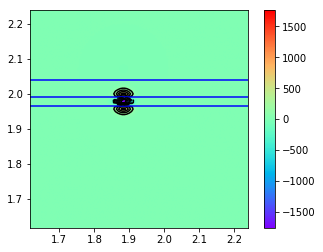

In [105]:
twod.plot()